In [393]:
import pandas as pd

In [394]:
returns = pd.read_csv("/home/lumi/Git/money-repo/Data/Data_Simple_Returns_90x240.csv")
sent_30 = pd.read_csv("/home/lumi/Git/money-repo/Data/30 Minutes Stocktwits Sentiment - 30Min Sentiment 1030 - 11.csv")
sent_90 = pd.read_csv("/home/lumi/Git/money-repo/Data/90 Minutes Stocktwits Sentiment - 90Min Sentiment 930-11.csv")

In [395]:
print(returns.shape)
print(sent_30.shape)
print(sent_90.shape)

(2003, 11)
(1307, 13)
(1307, 9)


In [396]:
returns["Time"] = pd.to_datetime(returns["Time"])
sent_30["Time"] = pd.to_datetime(sent_30["Time"])
sent_90["Time"] = pd.to_datetime(sent_90["Time"])

/tmp/ipykernel_73727/774782168.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  returns["Time"] = pd.to_datetime(returns["Time"])


In [397]:
# Convert Time to only be the date
returns["Time"] = returns["Time"].dt.date
sent_30["Time"] = sent_30["Time"].dt.date
sent_90["Time"] = sent_90["Time"].dt.date

In [398]:
# Sort by Date from oldest to newest, then reset index
returns = returns.sort_values(by="Time").reset_index(drop=True)
sent_30 = sent_30.sort_values(by="Time").reset_index(drop=True)
sent_90 = sent_90.sort_values(by="Time").reset_index(drop=True)

In [399]:
# Returns, drop Hour of Day
returns = returns.drop(columns=["Hour of Day "])

# Sent 30, drop Date and Time of Day
sent_30 = sent_30.drop(columns=["Date", "Time of Day"])

# Sent 90, drop Date and Time of Day
sent_90 = sent_90.drop(columns=["Date", "Time of Day"])

In [400]:
# For Returns, remove percent sign and convert to float for Previous 90 Minute Return (Input) and Next 240 Minute Return (OutPut)
returns["Previous 90 Minute Return (Input)"] = returns["Previous 90 Minute Return (Input)"].str.replace("%", "").astype(float)
returns["Next 240 Minute Return (OutPut)"] = returns["Next 240 Minute Return (OutPut)"].str.replace("%", "").astype(float)

In [401]:
low_thres = -0.05
high_thres = 0.05

# Create a new column for the 240 minute return, but as a ternary value
returns["y"] = returns["Next 240 Minute Return (OutPut)"].apply(lambda x: 2 if x >= high_thres else 0 if x <= low_thres else 1)

returns = returns.drop(columns=["Next 240 Minute Return (OutPut)"])

In [402]:
returns.head()

,Time,Previous 90 Minute Return (Input),Bucket 1 (-100 - -.80%) Prev 90 minute return,Bucket 2 (-.8% - -.4%) Prev 90 minute return,Bucket 3 (-.40% - -.1%),Bucket 4 (-.1% - .1%),Bucket 5 (.1% - 0.40%) Prev 90 minute return,Bucket 6 (.4% - 0.8%) Prev 90 minute return,Bucket 7 (0.8% - 100%) Prev 90 minute return,y
0,2016-01-04,-0.67,0,1,0,0,0,0,0,2
1,2016-01-05,-0.05,0,0,0,1,0,0,0,1
2,2016-01-06,0.46,0,0,0,0,0,1,0,0
3,2016-01-07,0.95,0,0,0,0,0,0,1,0
4,2016-01-08,-0.45,0,1,0,0,0,0,0,0


In [403]:
sent_30.head()

,Time,Tweets,Positive,Negative,Neutral,Positive %,Negative %,Neutral %,Sentiment Index,30min Sentiment Index,30 min normalized Sentiment Index
0,2020-03-23,346,10,72,264,0.028902,0.208092,0.763006,-0.179191,-0.179191,0.410405
1,2020-03-24,460,37,84,339,0.080435,0.182609,0.736957,-0.102174,-0.102174,0.448913
2,2020-03-25,336,15,57,264,0.044643,0.169643,0.785714,-0.125000,-0.125000,0.437500
3,2020-03-26,468,20,97,351,0.042735,0.207265,0.750000,-0.164530,-0.164530,0.417735
4,2020-03-27,411,16,79,316,0.038929,0.192214,0.768856,-0.153285,-0.153285,0.423358


In [404]:
sent_90.head()

,Time,90min Tweets,90min Positive,90min Negative,90min Neutral,90min Sentiment Index,90 min normalized Sentiment Index
0,2020-03-23,1139,45,205,889,-0.140474,0.429763
1,2020-03-24,1269,88,217,964,-0.101655,0.449173
2,2020-03-25,1267,65,229,973,-0.129440,0.435280
3,2020-03-26,1492,80,288,1124,-0.139410,0.430295
4,2020-03-27,1264,45,274,945,-0.181171,0.409415


In [405]:
sent_90.tail()

,Time,90min Tweets,90min Positive,90min Negative,90min Neutral,90min Sentiment Index,90 min normalized Sentiment Index
1302,2023-10-16,1040,73,141,826,-0.065385,0.467308
1303,2023-10-17,1014,77,147,790,-0.069034,0.465483
1304,2023-10-18,1177,73,194,910,-0.102804,0.448598
1305,2023-10-19,867,40,133,694,-0.107266,0.446367
1306,2023-10-20,1219,68,205,946,-0.112387,0.443806


In [406]:
# Merge the dataframes by the Time column, allowing for NaN values
merged = returns.merge(sent_30, on="Time", how="left")
merged = merged.merge(sent_90, on="Time", how="left")

merged.shape

(2003, 26)

In [407]:
# print columns with NaNs
miss_cols = merged.columns[merged.isna().any()].tolist()

In [408]:
# # Fill NaN values with 0
merged = merged.fillna(0)

# note to self: spline interpolation for missing values
# merged = merged.interpolate(method="polynomial", limit_direction="both", axis = 0, order = 3)

In [409]:
# Move 'Next 240 Minute Return (OutPut)' to the end of the dataframe
cols = list(merged.columns.values)
cols.pop(cols.index('y'))
merged = merged[cols+['y']]
merged.head()

,Time,Previous 90 Minute Return (Input),Bucket 1 (-100 - -.80%) Prev 90 minute return,Bucket 2 (-.8% - -.4%) Prev 90 minute return,Bucket 3 (-.40% - -.1%),Bucket 4 (-.1% - .1%),Bucket 5 (.1% - 0.40%) Prev 90 minute return,Bucket 6 (.4% - 0.8%) Prev 90 minute return,Bucket 7 (0.8% - 100%) Prev 90 minute return,Tweets,...,Sentiment Index,30min Sentiment Index,30 min normalized Sentiment Index,90min Tweets,90min Positive,90min Negative,90min Neutral,90min Sentiment Index,90 min normalized Sentiment Index,y
0,2016-01-04,-0.67,0,1,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,2016-01-05,-0.05,0,0,0,1,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2016-01-06,0.46,0,0,0,0,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2016-01-07,0.95,0,0,0,0,0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2016-01-08,-0.45,0,1,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


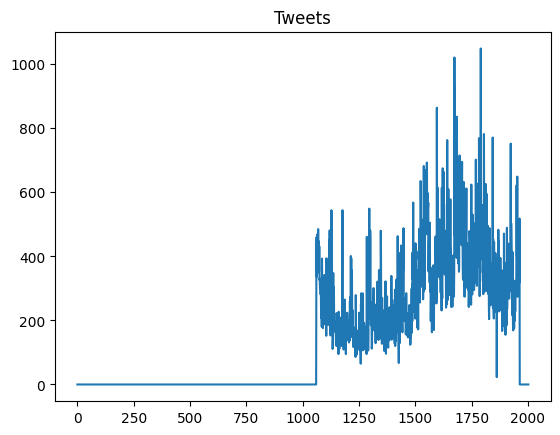

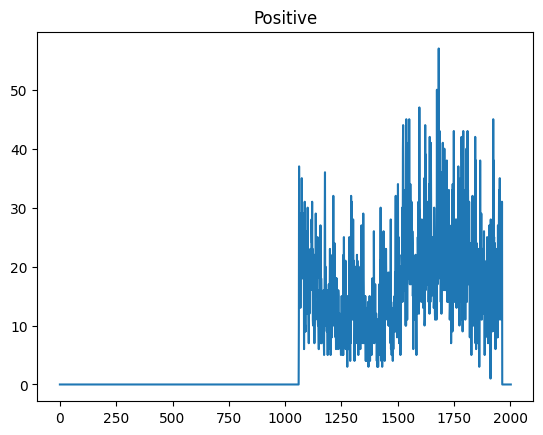

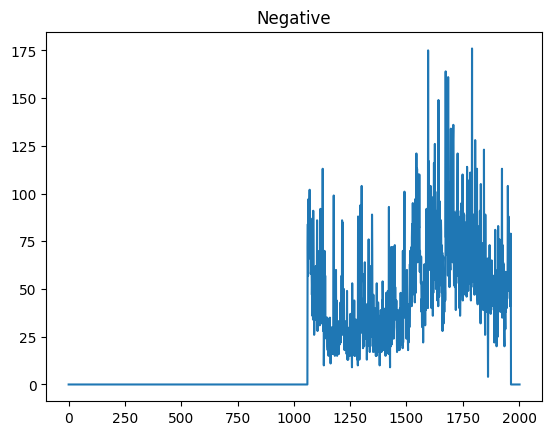

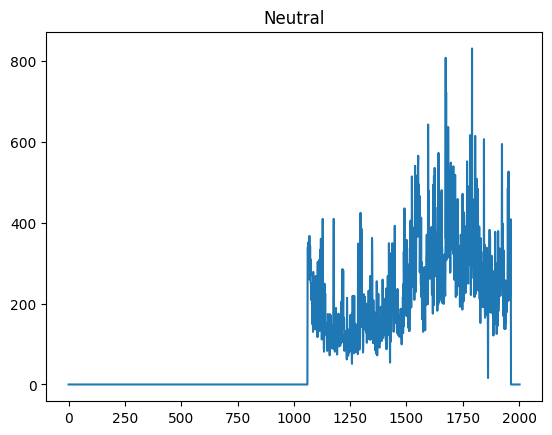

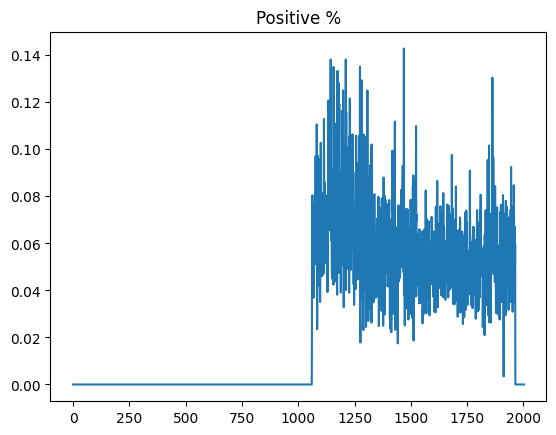

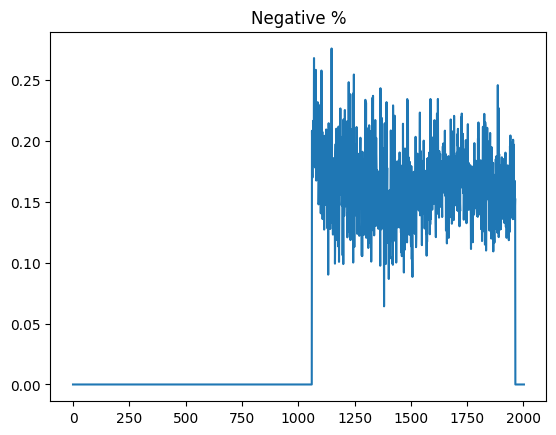

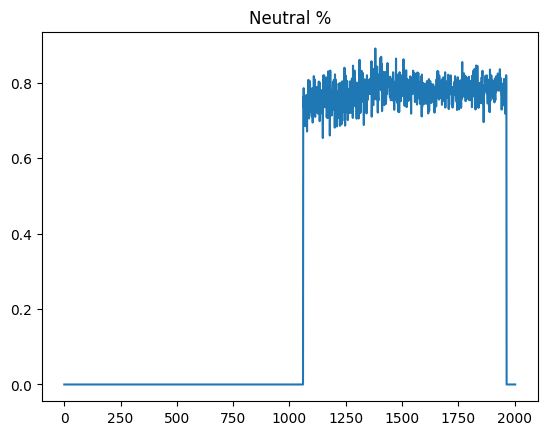

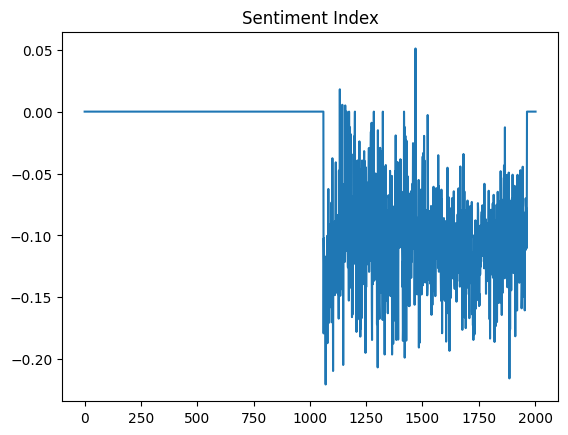

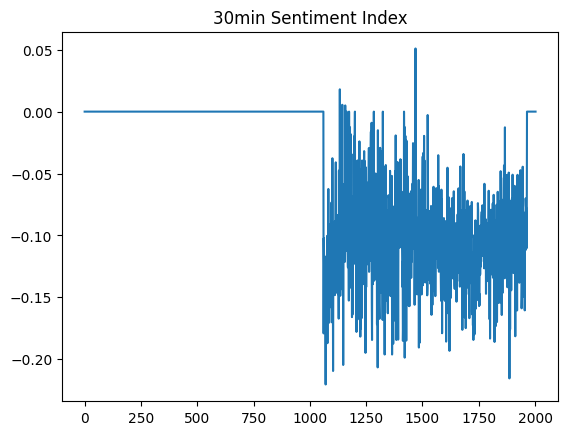

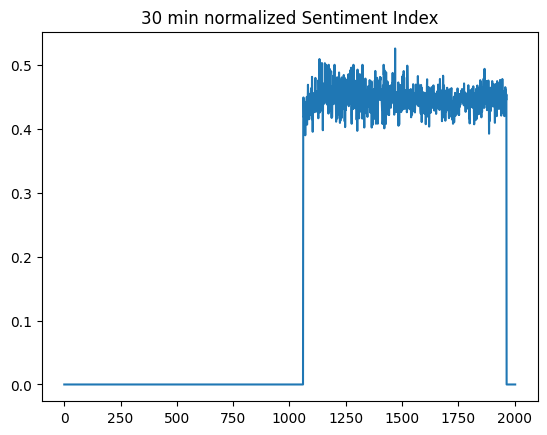

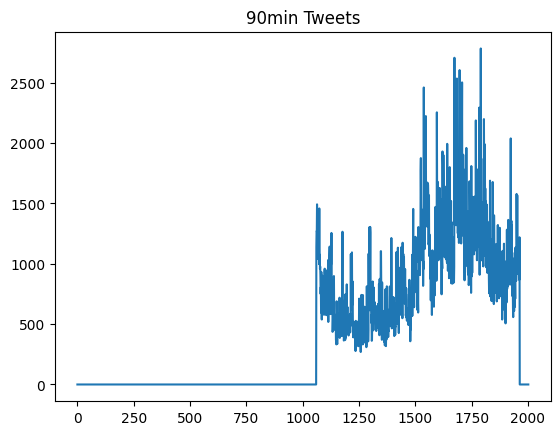

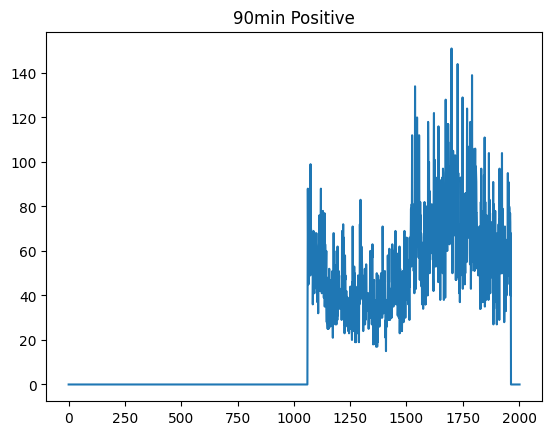

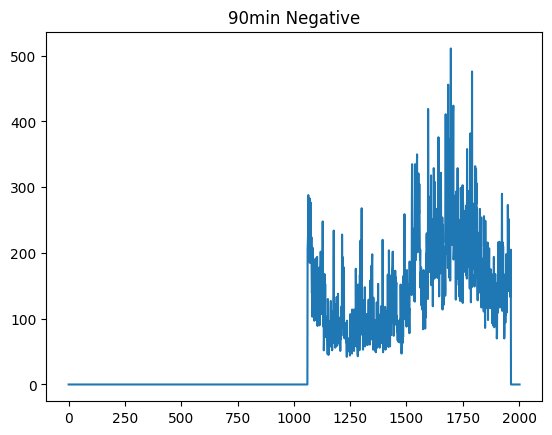

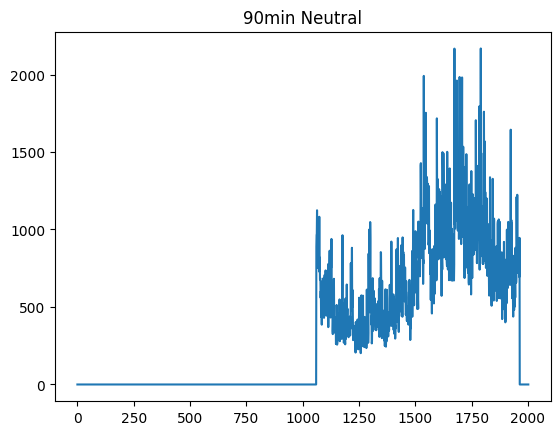

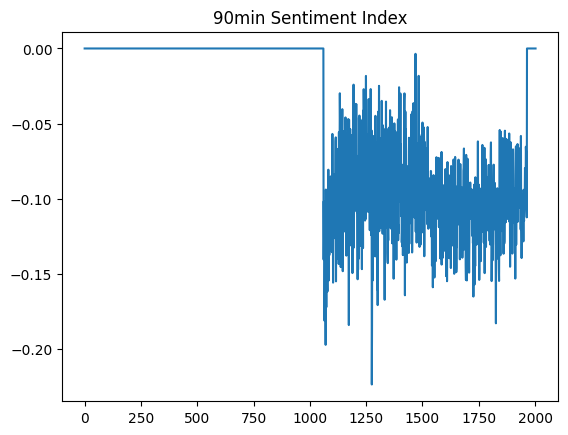

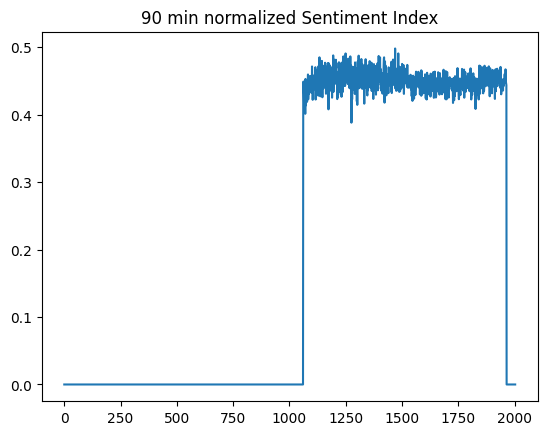

In [410]:
# Plot the data of the missing columns
import matplotlib.pyplot as plt

for col in miss_cols:
    plt.plot(merged[col])
    plt.title(col)
    plt.show()
    

In [411]:
merged.columns

Index(['Time', 'Previous 90 Minute Return (Input)',
       'Bucket 1 (-100 - -.80%) Prev 90 minute return',
       'Bucket 2 (-.8% - -.4%) Prev 90 minute return ',
       'Bucket 3 (-.40% - -.1%)', 'Bucket 4 (-.1% - .1%)',
       'Bucket 5 (.1% - 0.40%) Prev 90 minute return',
       'Bucket 6 (.4% - 0.8%) Prev 90 minute return',
       'Bucket 7 (0.8% - 100%) Prev 90 minute return', 'Tweets', 'Positive',
       'Negative', 'Neutral', 'Positive %', 'Negative %', 'Neutral %',
       'Sentiment Index', '30min Sentiment Index',
       '30 min normalized Sentiment Index', '90min Tweets', '90min Positive',
       '90min Negative', '90min Neutral', '90min Sentiment Index',
       '90 min normalized Sentiment Index', 'y'],
      dtype='object')

In [412]:
cols = ['Previous 90 Minute Return (Input)',
       'Bucket 1 (-100 - -.80%) Prev 90 minute return',
       'Bucket 2 (-.8% - -.4%) Prev 90 minute return ',
       'Bucket 3 (-.40% - -.1%)', 'Bucket 4 (-.1% - .1%)',
       'Bucket 5 (.1% - 0.40%) Prev 90 minute return',
       'Bucket 6 (.4% - 0.8%) Prev 90 minute return',
       'Bucket 7 (0.8% - 100%) Prev 90 minute return', 'Tweets', 'Positive',
       'Negative', 'Neutral', 'Positive %', 'Negative %', 'Neutral %',
       'Sentiment Index', '30min Sentiment Index',
       '30 min normalized Sentiment Index', '90min Tweets', '90min Positive',
       '90min Negative', '90min Neutral', '90min Sentiment Index',
       '90 min normalized Sentiment Index']

cols_return_sent_30 = [
       'Bucket 1 (-100 - -.80%) Prev 90 minute return',
       'Bucket 2 (-.8% - -.4%) Prev 90 minute return ',
       'Bucket 3 (-.40% - -.1%)', 'Bucket 4 (-.1% - .1%)',
       'Bucket 5 (.1% - 0.40%) Prev 90 minute return',
       'Bucket 6 (.4% - 0.8%) Prev 90 minute return',
       'Bucket 7 (0.8% - 100%) Prev 90 minute return',
       '30 min normalized Sentiment Index']

In [413]:
to_save = merged[["Time"] + cols_return_sent_30 + ["y"]]

In [414]:
to_save.head()

,Time,Bucket 1 (-100 - -.80%) Prev 90 minute return,Bucket 2 (-.8% - -.4%) Prev 90 minute return,Bucket 3 (-.40% - -.1%),Bucket 4 (-.1% - .1%),Bucket 5 (.1% - 0.40%) Prev 90 minute return,Bucket 6 (.4% - 0.8%) Prev 90 minute return,Bucket 7 (0.8% - 100%) Prev 90 minute return,30 min normalized Sentiment Index,y
0,2016-01-04,0,1,0,0,0,0,0,0.0,2
1,2016-01-05,0,0,0,1,0,0,0,0.0,1
2,2016-01-06,0,0,0,0,0,1,0,0.0,0
3,2016-01-07,0,0,0,0,0,0,1,0.0,0
4,2016-01-08,0,1,0,0,0,0,0,0.0,0


In [415]:
to_save.to_csv("/home/lumi/Git/money-repo/Data/return_buckets_30min_sent_index.csv", index=False)